In [2]:
import math
import numpy as np
from typing import List
import copy
from itertools import tee
import matplotlib.pyplot as plt
import ccdm, modulation, pcs, plots
from scipy.stats import gaussian_kde
from scipy.stats import norm

In [10]:
print(np.__version__)

1.26.4


In [11]:
# configuração do PCS-QAM

config = {
            "modulation_type": "qam",
            "constellation_size": 64, 
            "num_modes": 2,
            "show_progress": True,
            "modulation_type" : "pcsqam",
            "pcs_num_symbols" : int(1e2), 
            "lambda_param": 0.2
        }

In [18]:
# Gerar parametros para o algoritmo CCDM
config = pcs.probabilistic_shaping_config(config)
src_symbols = np.random.randint(0, 2, config["num_bits"])
print(f"tamanho da sequencia de bits de entrada: {config['num_bits']}")
# Codificar os símbolos de entrada usando o esquema de modelagem probabilística
Stx, txSyms = pcs.probabilistic_shaping_encode(src_symbols, config)
print(f"tamanho da sequencia de bits de saída: {len(Stx)}")
print(f"Symbols: {txSyms}")

tamanho da sequencia de bits de entrada: 468
tamanho da sequencia de bits de saída: 100
Symbols: [62, 19, 52, 22, 59, 54, 50, 14, 27, 63, 63, 18, 47, 55, 15, 3, 53, 56, 23, 52, 55, 24, 43, 21, 64, 17, 57, 23, 28, 55, 20, 51, 61, 24, 8, 10, 63, 44, 13, 11, 28, 12, 41, 60, 11, 51, 19, 59, 24, 9, 51, 45, 46, 25, 6, 40, 39, 32, 36, 59, 31, 23, 23, 56, 23, 7, 20, 58, 4, 56, 35, 2, 22, 31, 15, 19, 51, 49, 55, 51, 27, 48, 64, 26, 27, 19, 34, 29, 32, 20, 52, 55, 19, 31, 38, 42, 18, 60, 16, 30]


### Variância da distribuição

**Comparação com a Variância Gaussiana**

Para uma distribuição Gaussiana verdadeira $\mathcal{CN}(0, \sigma^2)$:

- A variância é $\sigma^2$ por dimensão (real/imaginária).
- A variância total (potência) para o sinal complexo é $2\sigma^2$.

No caso discreto com DM:
- A variância calculada é a potência média total do sinal modulado.

$\mathrm{Var}(S) = \sum_{i=1}^{M} p_i \cdot |s_i|^2$

In [13]:
variance = np.sum(config["pcs_pOpt"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações calculado por Maxwell-Boltzman: {variance:.4f}")

variance_cons = np.sum(config["pcs_symProb"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações após quantização: {variance_cons:.4f}")

variance_sym = np.mean(np.abs(Stx)**2)
print(f"Variância dos símbolos transmitidos: {variance_sym:.4f}")

Variância dos símbolos das constelações calculado por Maxwell-Boltzman: 0.6020
Variância dos símbolos das constelações após quantização: 0.6343
Variância dos símbolos transmitidos: 0.6343


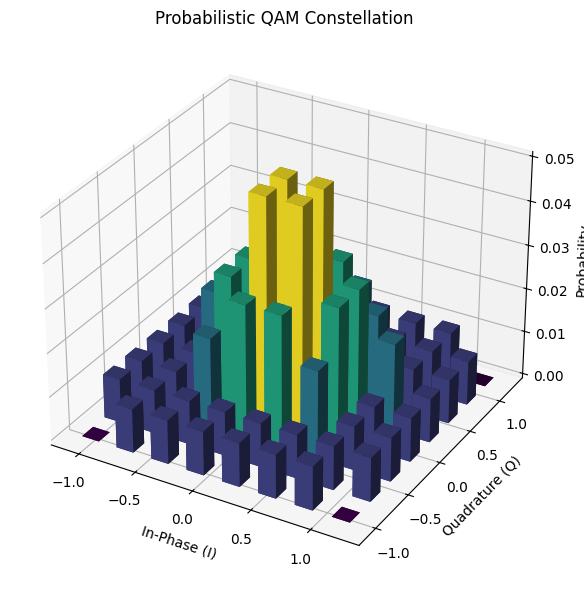

In [14]:
plots.plot_qam_constellation_3d(config["pcs_IQmap"], config["pcs_symProb"])

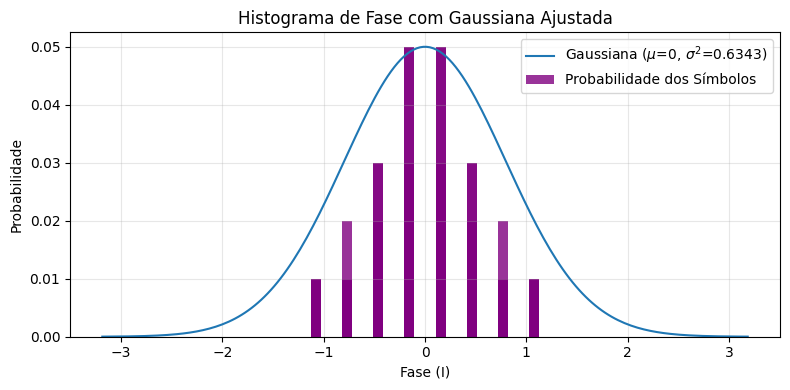

In [15]:
plots.plot_pmf_gaussiana(config["pcs_IQmap"], config["pcs_symProb"], variance_cons, 0)

In [17]:
decoded_symbols = ccdm.decode(txSyms, config["pcs_symFreq"], config["num_bits"])
print("Decoded = ",decoded_symbols)

Decoded =  [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0